In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- step-1read-the-data

In [2]:
bank_data=pd.read_csv(r"C:\Users\HP\OneDrive\data scince\python class/bank-additional.csv",sep=';')
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


- Step-2: Data Quick Checks

In [3]:
len(bank_data)

4119

In [4]:
type(bank_data)

pandas.core.frame.DataFrame

In [5]:
bank_data.take([1],axis=0)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [6]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank_data.shape

(4119, 21)

In [8]:
bank_data.size

86499

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [10]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [11]:
bank_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4109,63,retired,married,high.school,no,no,no,cellular,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
4110,53,housemaid,divorced,basic.6y,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4111,30,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no
4112,31,technician,single,professional.course,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4113,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


- Step-3: Convert Categorical Columns and Identify Numerical Columns

In [12]:
bank_data.job

0       blue-collar
1          services
2          services
3          services
4            admin.
           ...     
4114         admin.
4115         admin.
4116        student
4117         admin.
4118     management
Name: job, Length: 4119, dtype: object

In [13]:
bank_data.age

0       30
1       39
2       25
3       38
4       47
        ..
4114    30
4115    39
4116    27
4117    58
4118    34
Name: age, Length: 4119, dtype: int64

In [14]:
bank_data.marital

0       married
1        single
2       married
3       married
4       married
         ...   
4114    married
4115    married
4116     single
4117    married
4118     single
Name: marital, Length: 4119, dtype: object

In [15]:
bank_data.education	

0                basic.9y
1             high.school
2             high.school
3                basic.9y
4       university.degree
              ...        
4114             basic.6y
4115          high.school
4116          high.school
4117          high.school
4118          high.school
Name: education, Length: 4119, dtype: object

In [16]:
i=bank_data['education'].unique()
i

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [17]:
i=categorical_columns=bank_data.select_dtypes(include=['object']).columns

In [18]:
i

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [19]:
i2=bank_data[categorical_columns]=bank_data[categorical_columns].astype('category')
i2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


In [20]:
i3=numerical_columns = bank_data.select_dtypes(include=['number']).columns
i3

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [21]:
unique_cnt=bank_data['education'].unique()
for i in unique_cnt:
    con=bank_data['education']==i
    val=len(bank_data[con])
    print(f"{i}:{val}")

basic.9y:574
high.school:921
university.degree:1264
professional.course:535
basic.6y:228
basic.4y:429
unknown:167
illiterate:1


In [22]:
unique_cnt=bank_data['marital'].unique()
for i in unique_cnt:
    con=bank_data['marital']==i
    val=len(bank_data[con])
    print(f"{i}:{val}")

married:2509
single:1153
divorced:446
unknown:11


- Step-4: Fill the Missing Values

In [8]:
bank_data=pd.read_csv(r"C:\Users\HP\OneDrive\data scince\python class/bank-additional.csv",sep=';')
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [8]:
bank_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
bank_data.fillna(method='backfill')

C:\Users\HP\AppData\Local\Temp\ipykernel_6028\2437399260.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bank_data.fillna(method='backfill')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [11]:
bank_data.fillna(method='backfill')

C:\Users\HP\AppData\Local\Temp\ipykernel_6028\2437399260.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bank_data.fillna(method='backfill')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [14]:
bank_data.mode()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no


- Step-5: Categorical data analysis
- Unique
- nunique
- value counts
- bar chart
- count plot
- pie chart

In [17]:
con=bank_data['marital'].unique()
con

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [22]:
con=bank_data['education'].nunique()
con

8

In [24]:
con=bank_data['education'].value_counts()
con

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [26]:
con=bank_data['marital'].value_counts()
con

marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64

In [27]:
con.keys()

Index(['married', 'single', 'divorced', 'unknown'], dtype='object', name='marital')

In [28]:
con.value_counts()

count
2509    1
1153    1
446     1
11      1
Name: count, dtype: int64

In [29]:
con.index

Index(['married', 'single', 'divorced', 'unknown'], dtype='object', name='marital')

In [30]:
bank_data.index

RangeIndex(start=0, stop=4119, step=1)

<function matplotlib.pyplot.show(close=None, block=None)>

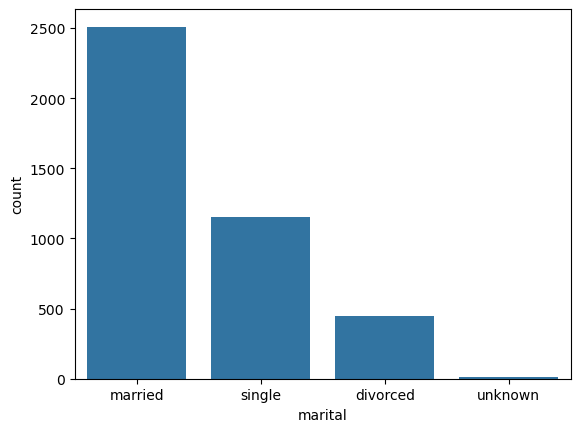

In [41]:
sns.countplot(data=bank_data,x='marital')
plt.show

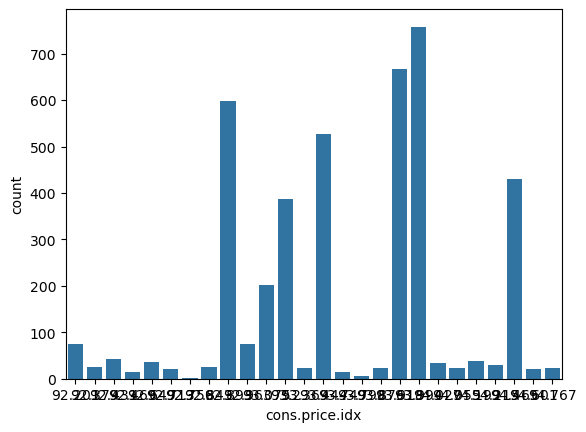

In [44]:
sns.countplot(data=bank_data,x='cons.price.idx')
plt.show()

In [23]:
con=bank_data['education'].value_counts()
con.keys()
plt.bar('education','count',data=) # plot# plot # plot
plt.title("bar chart")# title of the plot
plt.xlabel("continent") # 
plt.ylabel("count")
plt.savefig("barchart.jpg")
plt.show()

KeyError: 'education'

<Axes: >

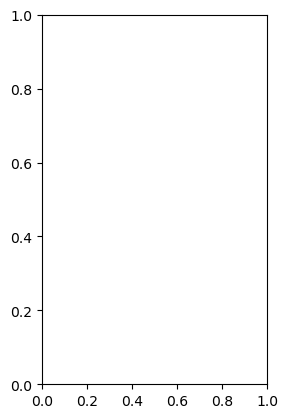

In [51]:
plt.subplot(1,2,1)

<Axes: >

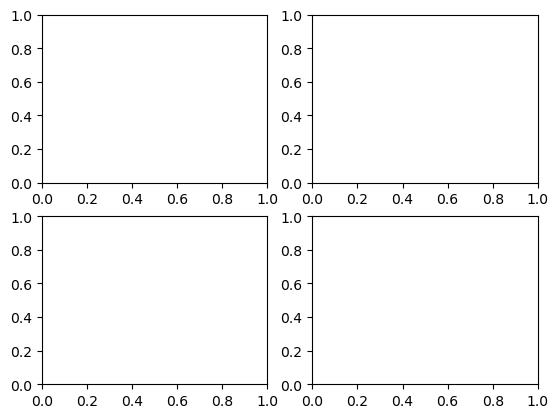

In [57]:
con=bank_data['marital'].value_counts()
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

In [28]:
con=bank_data,education['20,40,50'].count()
plt.figure(figsize=(4,8))
plt.bar(education,values,color='red')
plt.title("barchart")
plt.show()

NameError: name 'education' is not defined

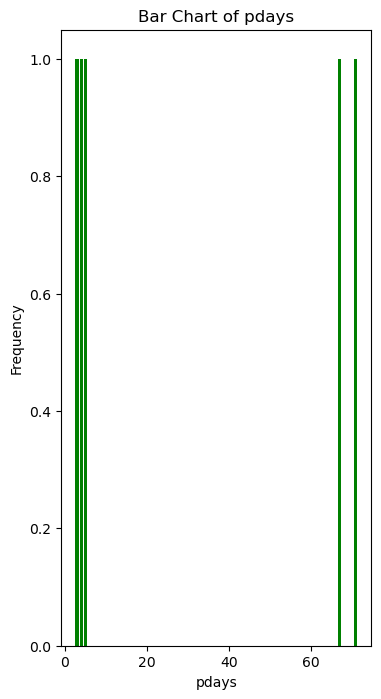

In [17]:
# Sample bank_data for demonstration
data = {'pdays':[3,4,5,67,71]}
bank_data = pd.DataFrame(data)

# Counting the occurrences of each unique value in pdays
pdays_counts = bank_data['pdays'].value_counts()

# Plotting
plt.figure(figsize=(4, 8))
plt.bar(pdays_counts.index, pdays_counts.values, color='green')
plt.title('Bar Chart of pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

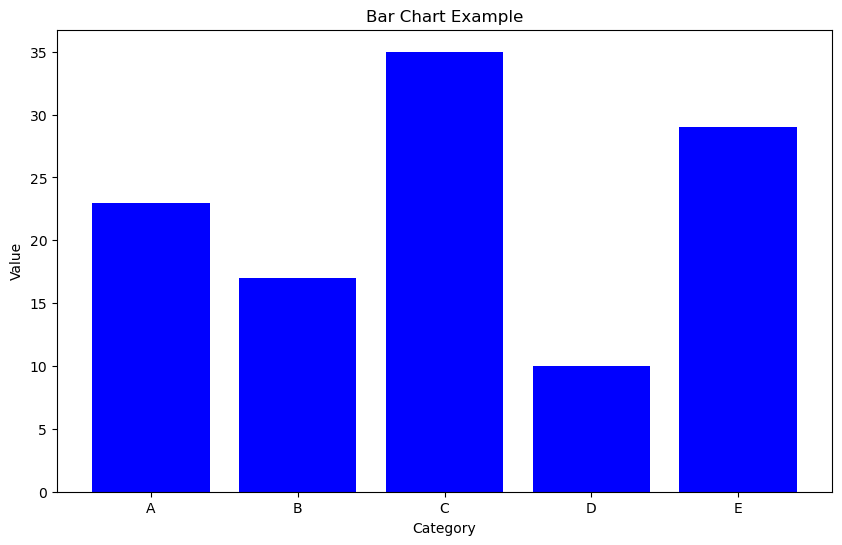

In [4]:
import matplotlib.pyplot as plt

# Data
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 17, 35, 10, 29]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='blue')

# Add title and labels
plt.title('Bar Chart Example')
plt.xlabel('Category')
plt.ylabel('Value')

# Show the plot
plt.show()

In [ ]:
Categorical =['hero','vijay','uma']
values=[5,10,15,20]
plt.figure(figsize=(8,4))
plt.title("barchart")
plt.bar(categ